### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\MOHAN\1Data Scientist\Projects\Natural-Language-Processing-master\Fake News Classification\kaggle_fake_train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
X = df.drop('label',axis=1)

In [5]:
y = df['label']

In [6]:
df.shape

(20800, 5)

In [7]:
df = df.dropna()

In [8]:
df.shape

(18285, 5)

In [9]:
message = df.copy()

In [10]:
message.reset_index(inplace=True)

In [14]:
message.head(7)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0


In [12]:
message['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
Ps = PorterStemmer()
corpus = []
for i in range(0,len(message)):
    review = re.sub('[^a-zA-Z]',' ',message['text'][i])
    review = review.lower()
    review = review.split()
    review = [Ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
    
corpus


KeyboardInterrupt: 

In [23]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [26]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000, ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [28]:
X.shape

(18285, 5000)

In [29]:
y = message['label']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
tfidf.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [34]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [38]:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import matplotlib.pyplot as plt

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [42]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [41]:
from sklearn import metrics
import numpy as np
import itertools

accuracy :0.9017499088589136
Confusion matrix, without normalization


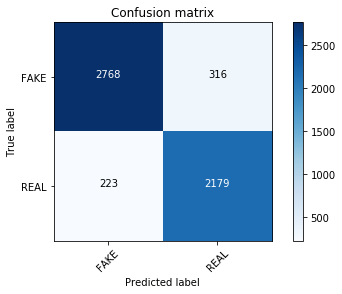

In [45]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('accuracy :{}'.format(score))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Passive Aggressive Classifier Algorithm

In [49]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.916
Confusion matrix, without normalization


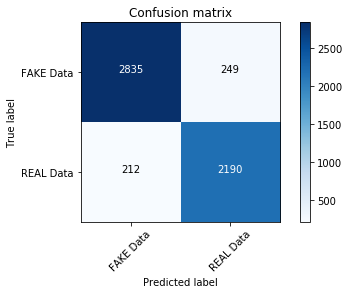

In [50]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [51]:
classifier=MultinomialNB(alpha=0.1)

In [57]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB()
    sub_classifier.fit(X_train,y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier = sub_classifier
    print('Alpha : {}, score : {}'.format(alpha,score))    
    

Alpha : 0.0, score : 0.9017499088589136
Alpha : 0.1, score : 0.9017499088589136
Alpha : 0.2, score : 0.9017499088589136
Alpha : 0.30000000000000004, score : 0.9017499088589136
Alpha : 0.4, score : 0.9017499088589136
Alpha : 0.5, score : 0.9017499088589136
Alpha : 0.6000000000000001, score : 0.9017499088589136
Alpha : 0.7000000000000001, score : 0.9017499088589136
Alpha : 0.8, score : 0.9017499088589136
Alpha : 0.9, score : 0.9017499088589136


In [63]:
feature_names=cv.get_feature_names()

In [68]:
len(feature_names)

5000

In [70]:
classifier.coef_[0]

array([ -9.12921708,  -8.65921345,  -9.12921708, ..., -10.73865499,
        -8.79274484,  -9.35236063])

In [65]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.002874978874175, 'trump'),
 (-4.2945237364160604, 'hillari'),
 (-4.386025596796935, 'clinton'),
 (-4.898013335743103, 'elect'),
 (-5.155158684334802, 'new'),
 (-5.249717266959815, 'comment'),
 (-5.2833338777588, 'video'),
 (-5.41077882432692, 'war'),
 (-5.41077882432692, 'us'),
 (-5.41077882432692, 'hillari clinton'),
 (-5.445350168392009, 'fbi'),
 (-5.460540333885985, 'vote'),
 (-5.545698142226291, 'email'),
 (-5.602856556066239, 'world'),
 (-5.638788565292303, 'obama'),
 (-5.728019699020246, 'donald'),
 (-5.761921250695927, 'donald trump'),
 (-5.775810362856594, 'russia'),
 (-5.8788425887548295, 'day'),
 (-5.8788425887548295, 'america')]

In [71]:
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.738654993116501, 'abe'),
 (-10.738654993116501, 'abroad'),
 (-10.738654993116501, 'abus new'),
 (-10.738654993116501, 'abus new york'),
 (-10.738654993116501, 'act new'),
 (-10.738654993116501, 'act new york'),
 (-10.738654993116501, 'advic'),
 (-10.738654993116501, 'advis new'),
 (-10.738654993116501, 'advis new york'),
 (-10.738654993116501, 'age new'),
 (-10.738654993116501, 'age new york'),
 (-10.738654993116501, 'agenda breitbart'),
 (-10.738654993116501, 'ail'),
 (-10.738654993116501, 'aleppo new'),
 (-10.738654993116501, 'aleppo new york'),
 (-10.738654993116501, 'ali'),
 (-10.738654993116501, 'america breitbart'),
 (-10.738654993116501, 'america new york'),
 (-10.738654993116501, 'american breitbart'),
 (-10.738654993116501, 'american new'),
 (-10.738654993116501, 'american new york'),
 (-10.738654993116501, 'ami'),
 (-10.738654993116501, 'ami schumer'),
 (-10.738654993116501, 'amp'),
 (-10.738654993116501, 'applaud'),
 (-10.738654993116501, 'arson'),
 (-10.73865499311650